## Replication of the linear Regression Analysis
https://github.com/ga-students/DSI-SF-3/blob/master/curriculum/week-03/linear_regression/linear_regression_sklearn.ipynb

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [2]:
data = datasets.load_boston()
print type(data)

<class 'sklearn.datasets.base.Bunch'>


In [3]:
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
## Here are the keys
data.keys()

['data', 'feature_names', 'DESCR', 'target']

In [5]:
data.values()[0]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [7]:
#df =pd.DataFrame?

In [8]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [9]:
targets = pd.DataFrame(data.target, columns=["MEDV"])

In [10]:
print targets.shape
print  '\n =====\n'
targets.head(3)

(506, 1)

 =====



,MEDV
0,24.0
1,21.6
2,34.7


In [11]:
## Analysis on just features

In [12]:
def miss_val(dfs):
    df.isnull().sum()

In [13]:
df.apply(miss_val, axis=0)

CRIM       None
ZN         None
INDUS      None
CHAS       None
NOX        None
RM         None
AGE        None
DIS        None
RAD        None
TAX        None
PTRATIO    None
B          None
LSTAT      None
dtype: object

In [14]:
targets.apply(miss_val, axis=0)

MEDV    None
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


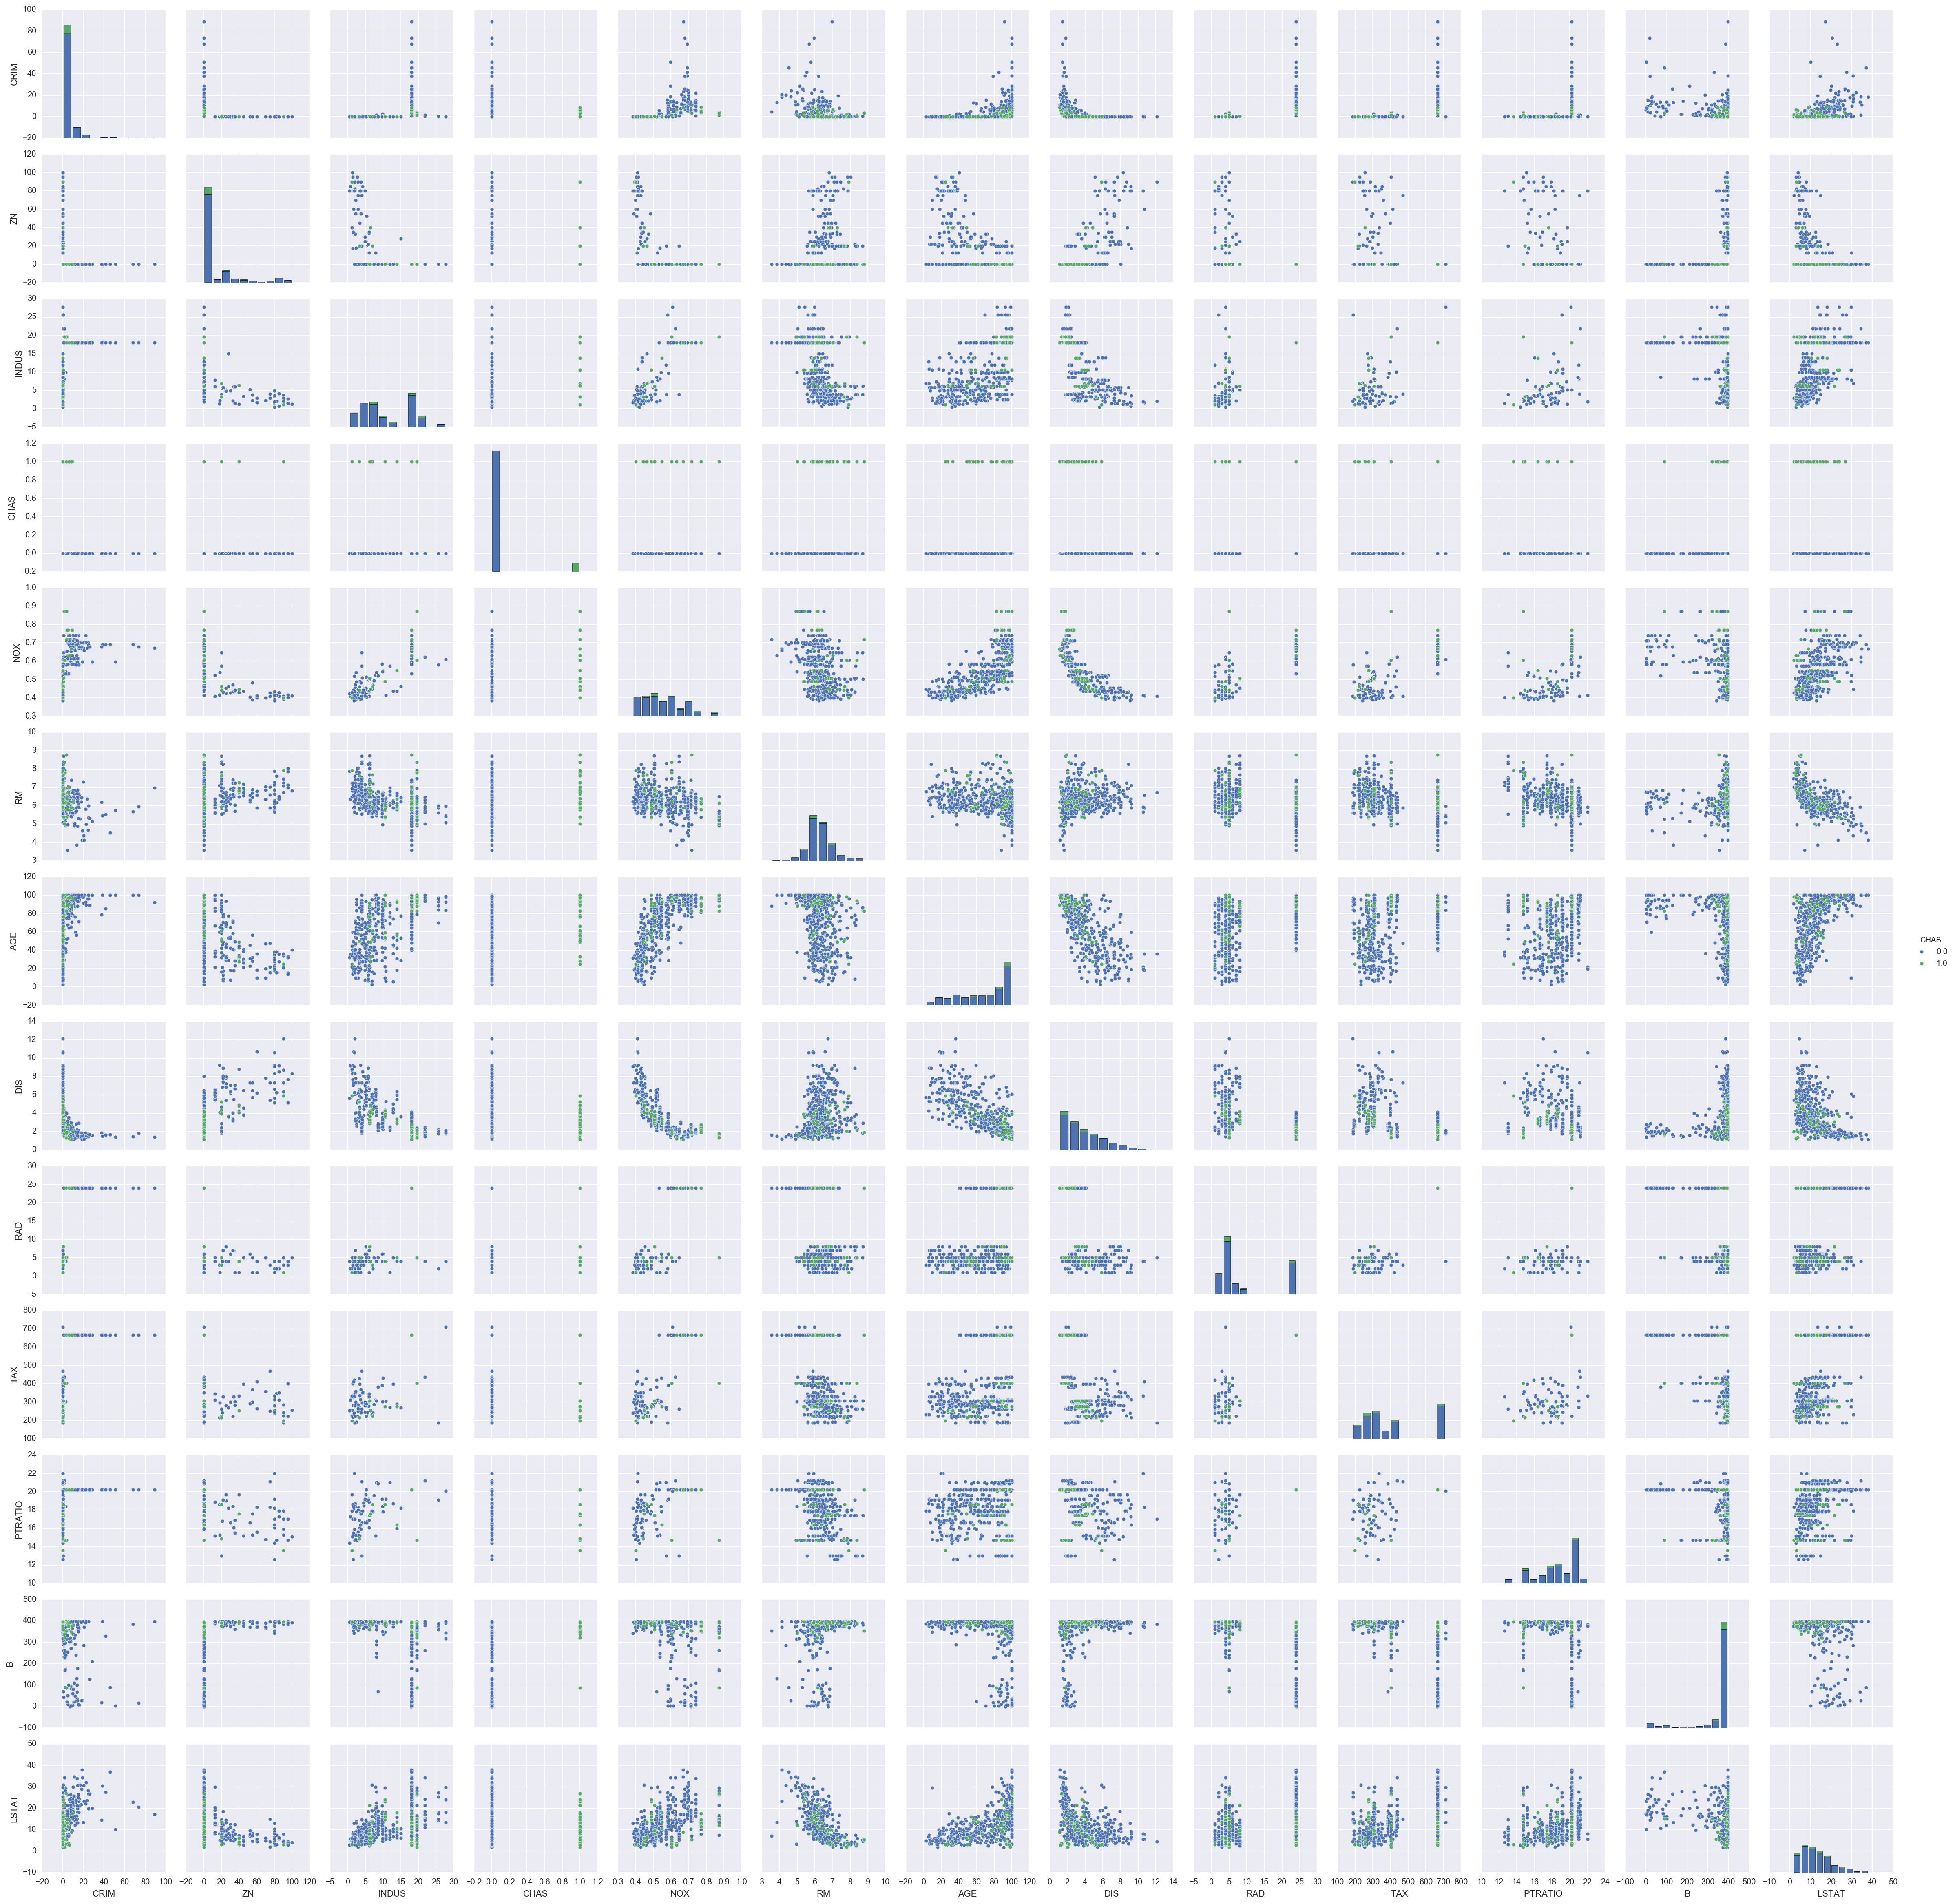

In [16]:
sns.pairplot(df, hue ="CHAS")

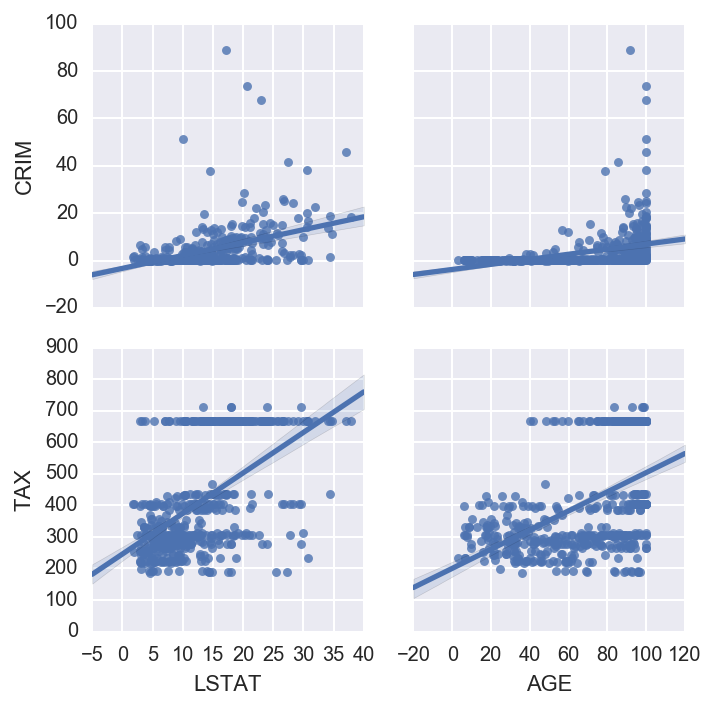

In [21]:
sns.pairplot(df,x_vars=["LSTAT", "AGE"],y_vars=["CRIM", "TAX"],kind="reg")

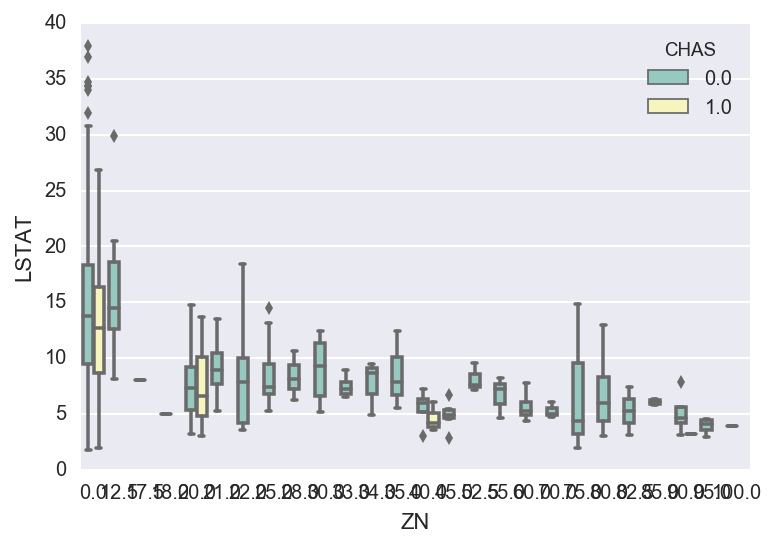

In [22]:
ax = sns.boxplot(x="ZN", y="LSTAT", hue="CHAS",data=df, palette="Set3")
plt.show()

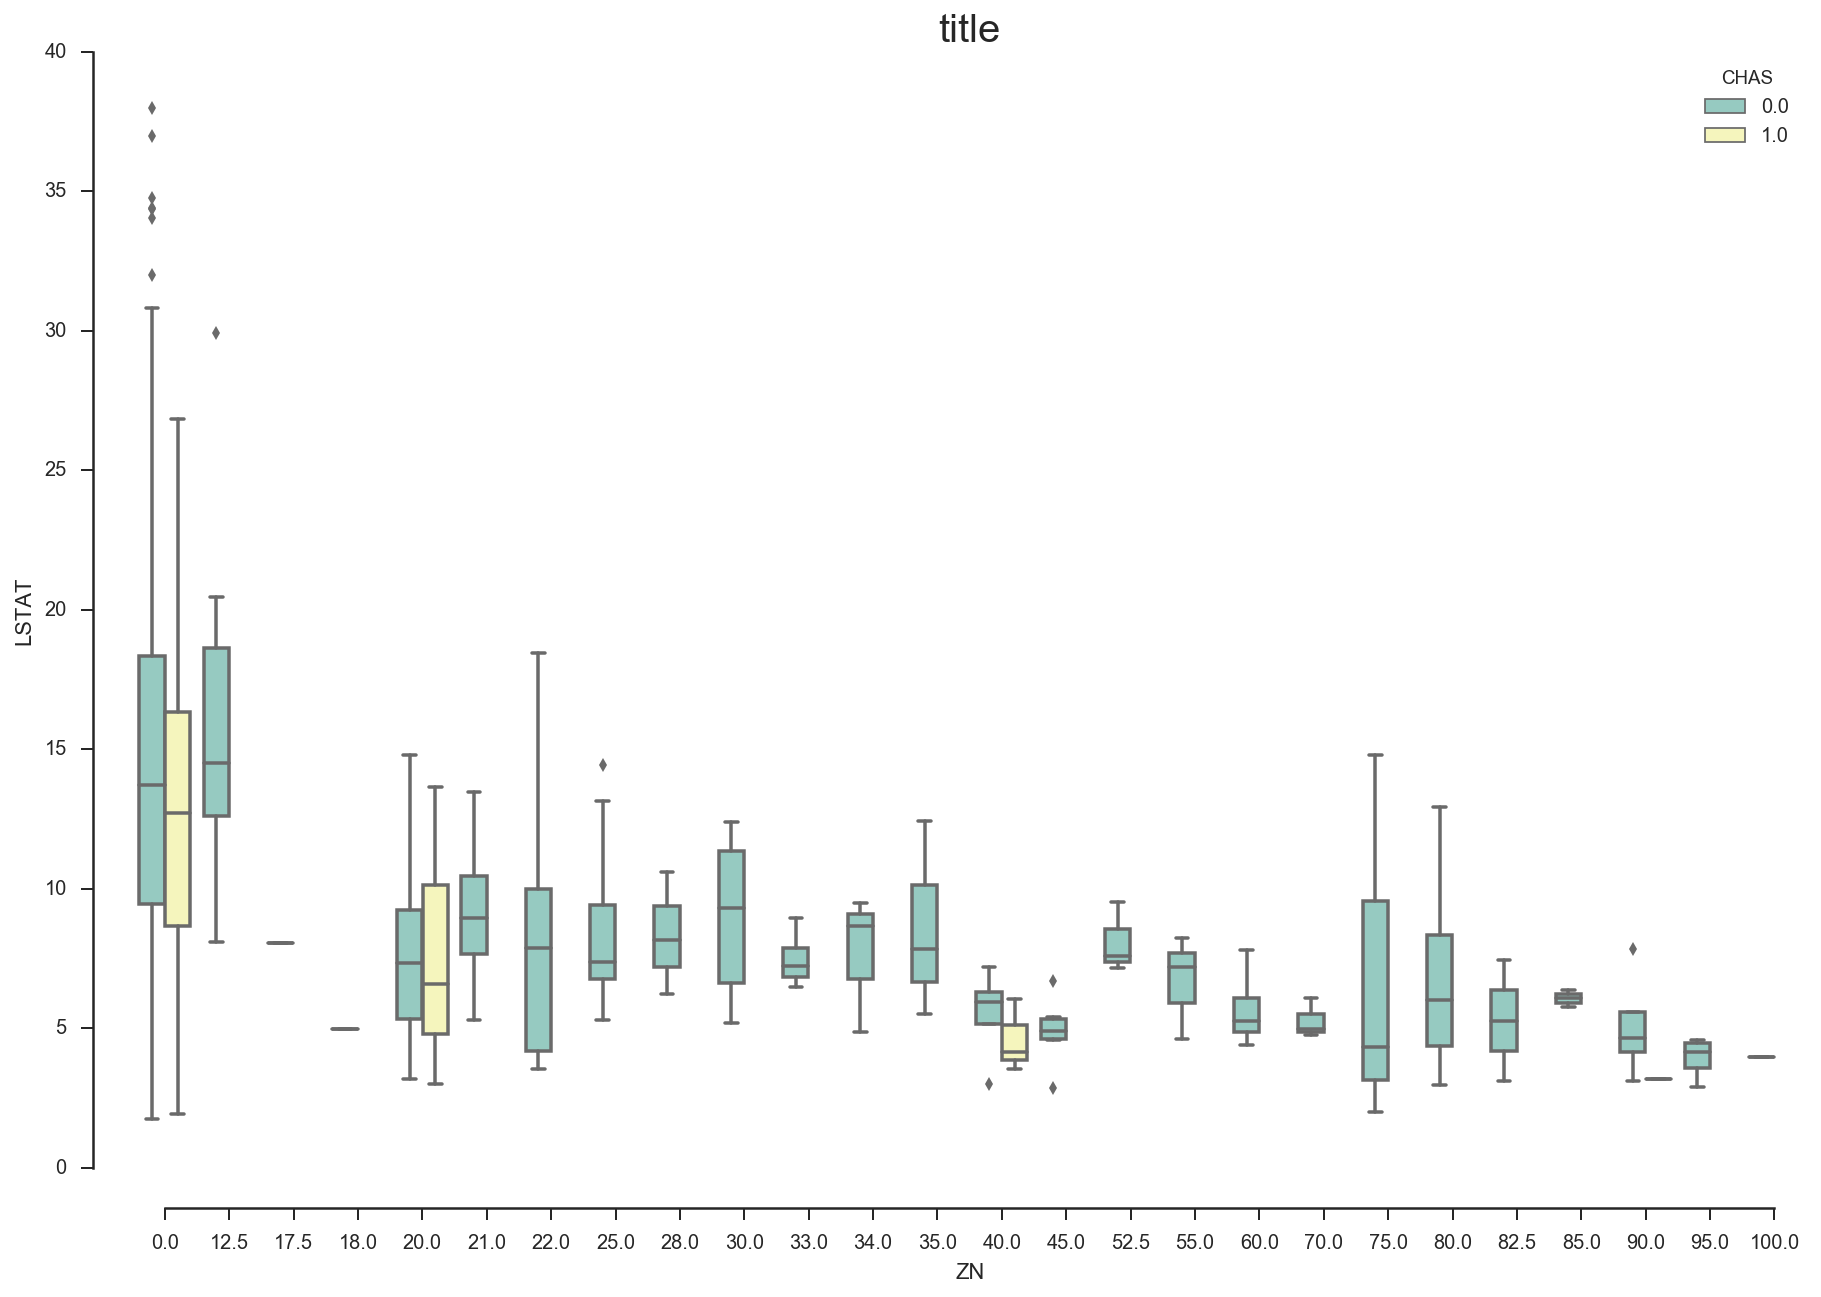

In [23]:
fig = plt.figure(figsize=(15,10))

sns.set(style="ticks")

sns.boxplot(x="ZN", y="LSTAT", hue="CHAS",data=df, palette="Set3")
sns.despine(offset=20, trim=True)

plt.title('title', fontsize = 20)
plt.show()

In [24]:
df.corr().T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


## Target Analysis

In [25]:
targets.apply(miss_val, axis =0)
target_mean =np.mean(targets)
#np.mean(targets)
print "The mean of  my target variable is  %s" %(target_mean)

The mean of  my target variable is  MEDV    22.532806
dtype: float64


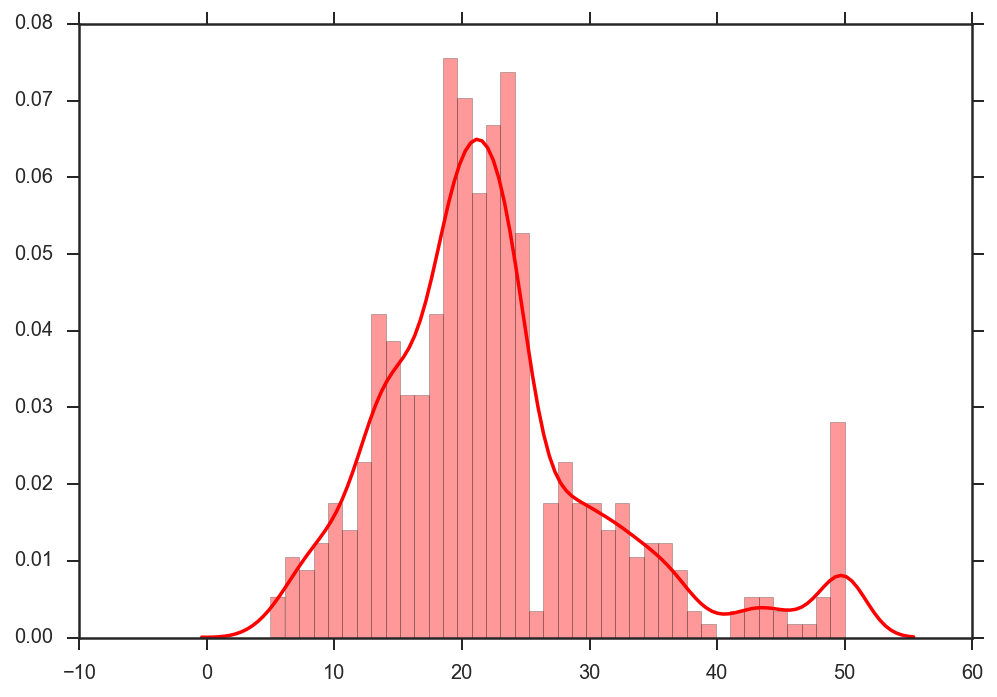

In [26]:
sns.distplot(targets, bins =40, color ='r')
plt.show()

## Regression Analysis

In [36]:
# Define  x and y
lm = linear_model.LinearRegression()

In [42]:
## Define  a model
x= df[['RM']]
y = targets['MEDV']

print x.shape, y.shape

(506, 1) (506,)


In [43]:
#type(y)

In [44]:
## fit the model
model = lm.fit(x,y)
print model


## predict 
predictions = model.predict(x)
print predictions


## score
score =model.score(x,y)
print score



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 25.17574577  23.77402099  30.72803225  29.02593787  30.38215211
  23.85593997  20.05125842  21.50759586  16.5833549   19.97844155
  23.3735282   20.02395209  18.93169901  19.47782555  20.81583557
  18.43108302  19.35039603  19.85101202  14.99048582  17.45715736
  16.02812625  19.6234593   21.23453259  18.23993873  19.25027283
  16.29208741  18.23993873  20.36983223  24.44757706  26.07685456
  17.32972783  20.59738496  19.48692766  17.22050253  20.81583557
  19.33219181  18.49479778  18.57671676  19.63256141  25.35778795
  29.26259271  26.95065703  21.48028953  21.86257811  20.57007863
  17.04756245  17.99418179  20.21509638  14.47166561  16.31939374
  19.60525508  20.98877564  24.5932108   19.92382889  18.9225969
  31.31056723  23.42814085  27.36935404  21.26183891  19.27757916
  17.58458688  19.63256141  24.09259481  26.87784015  29.99076143
  22.58164472  18.0032839   18.83157581  16.24657686  18.89529058


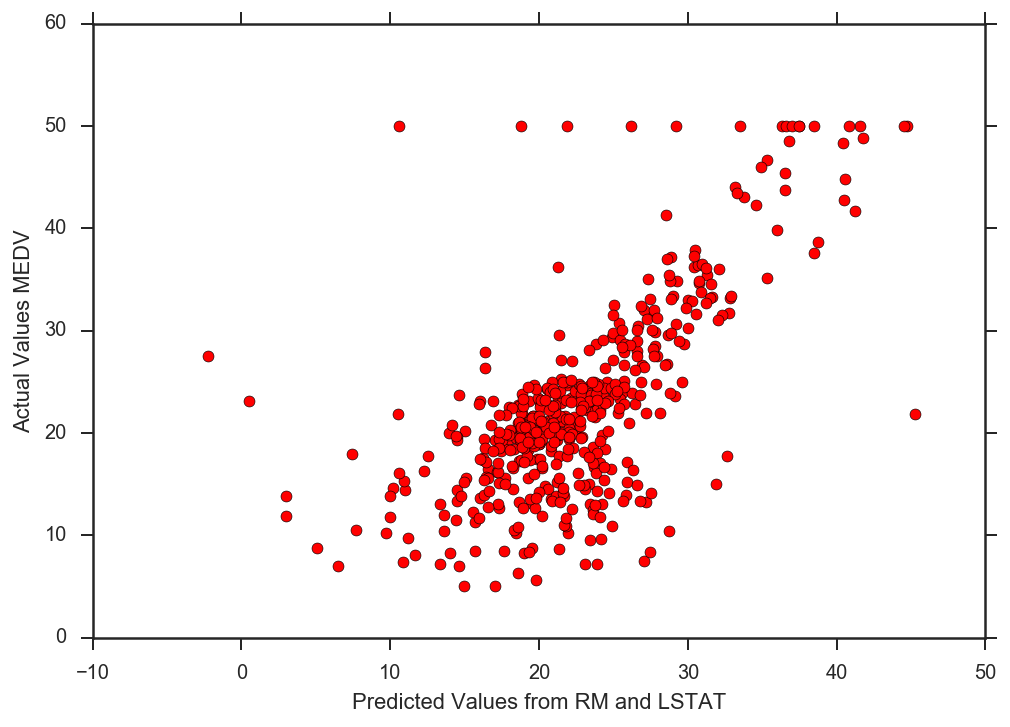

MSE: 43.6005517712


In [46]:
# plot the model
plt.scatter(predictions, y, s=30, c='r', marker='o', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [51]:
len(y)


506

In [50]:

print "MSE: \n%f \n" % mean_squared_error(y, predictions)

# Alternatively, you can calulate MSE this way 
print "Residual sum of squares: \n%.2f \n" % (np.mean((predictions - y) ** 2))

print "Coefficients ('RM'): \n%s \n" % model.coef_

# R^2 (predictions vs actual target) - normalized measure of variance
# Can be negative, typically between 0 and 1.  Cam be negative depending on predictions way out outside the range of your target / training.
# Sum of squares / residual sum of squares
# Or 1 - variance(residuals) / variance(y)
print "R^2 / Variance Explained Score (1 = perfect score): \n%f \n" % score

MSE: 
43.600552 

Residual sum of squares: 
43.60 

Coefficients ('RM'): 
[ 9.10210898] 

R^2 / Variance Explained Score (1 = perfect score): 
0.483525 



In [52]:
print (len(y))* mean_squared_error(y ,predictions)

22061.8791962


In [54]:
# see how your predictors are looking
compared = x

compared.loc[:, 'Predicted MEDV (y_hat)'] = predictions
compared.loc[:, 'Actual MED (y)'] = y

compared.head(5)

/Users/aishwaryachinnari/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/aishwaryachinnari/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,RM,Predicted MEDV (y_hat),Actual MED (y)
0,6.575,25.175746,24.0
1,6.421,23.774021,21.6
2,7.185,30.728032,34.7
3,6.998,29.025938,33.4
4,7.147,30.382152,36.2


In [57]:
import statsmodels.api as sm

X = df["RM"]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

predictions[0:10]
# Plot the model
#plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
#plt.xlabel("Predicted Values from RM")
#plt.ylabel("Actual Values MEDV")
#plt.show()

#print "MSE:", mean_squared_error(y, predictions)

array([ 24.02077888,  23.45816292,  26.24932262,  25.5661461 ,
        26.11049531,  23.49104307,  21.9639426 ,  22.54847867,
        20.5720161 ,  21.9347158 ])

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 06 Dec 2016   Prob (F-statistic):          3.74e-256
Time:                        14:27:22   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000         3.548     3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

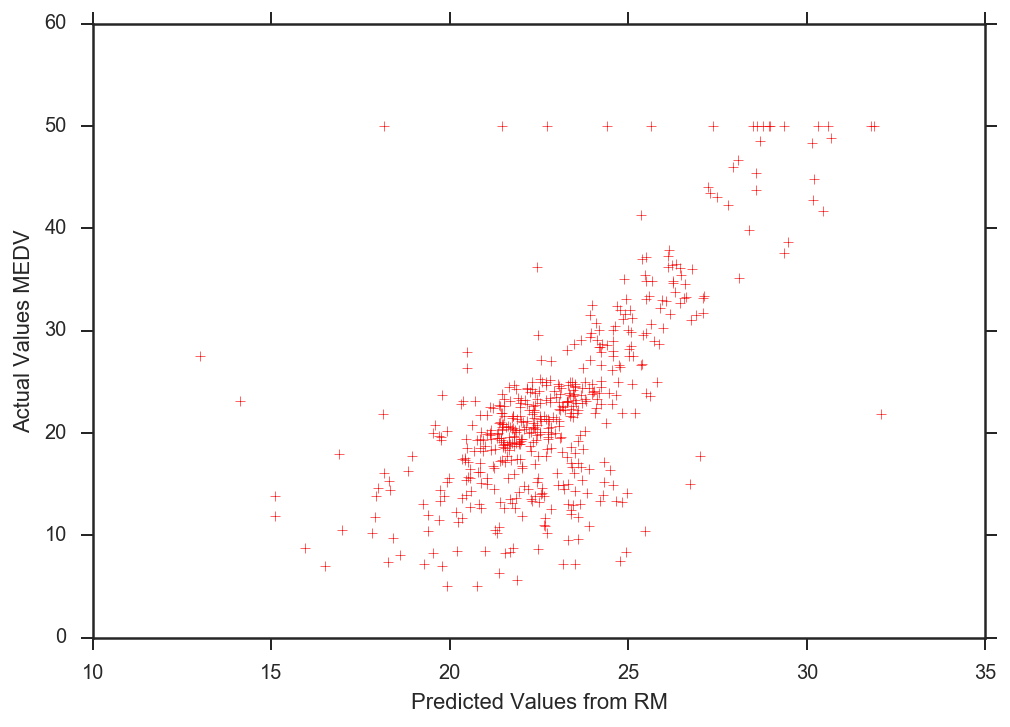

MSE: 58.4106354321


In [60]:
## Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

print "MSE:", mean_squared_error(y, predictions)            

### Train test split using more variables

In [61]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [74]:
x = df
y = targets['MEDV']

## train test split
from sklearn.model_selection import train_test_split
from sklearn import cross_validation

x_train,x_test, y_train,y_test  = cross_validation.train_test_split(x,y, test_size =0.3)

print "Shape of my original X dataframe =", x.shape
print "Shape of my original y dataframe =", y.shape
print "Shape of my original X train dataframe =", x_train.shape
print "Shape of my original y train dataframe =", y_train.shape
print "Shape of my original X test dataframe =", x_test.shape
print "Shape of my original Y test dataframe =", y_test.shape

Shape of my original X dataframe = (506, 13)
Shape of my original y dataframe = (506,)
Shape of my original X train dataframe = (354, 13)
Shape of my original y train dataframe = (354,)
Shape of my original X test dataframe = (152, 13)
Shape of my original Y test dataframe = (152,)


In [70]:
lm2 = linear_model.LinearRegression()


In [75]:
model2 = lm.fit(x_train,y_train)
print model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [80]:
model2.residues_

/Users/aishwaryachinnari/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


8042.5395564788196

In [81]:
model2.residues_?

In [78]:
predictions2 = model2.predict(x_test)
predictions2[0:15]

array([ 21.08324308,  30.26678444,  17.01847041,  16.42646762,
        21.54259489,  13.48187371,  42.50308506,   4.35715114,
         9.80097104,  17.95095037,  18.1672491 ,  23.69917401,
        24.6913225 ,  26.09476696,  17.40322785])

In [79]:
score2 = model2.score(x_train, y_train)
score2

0.7364360488760392

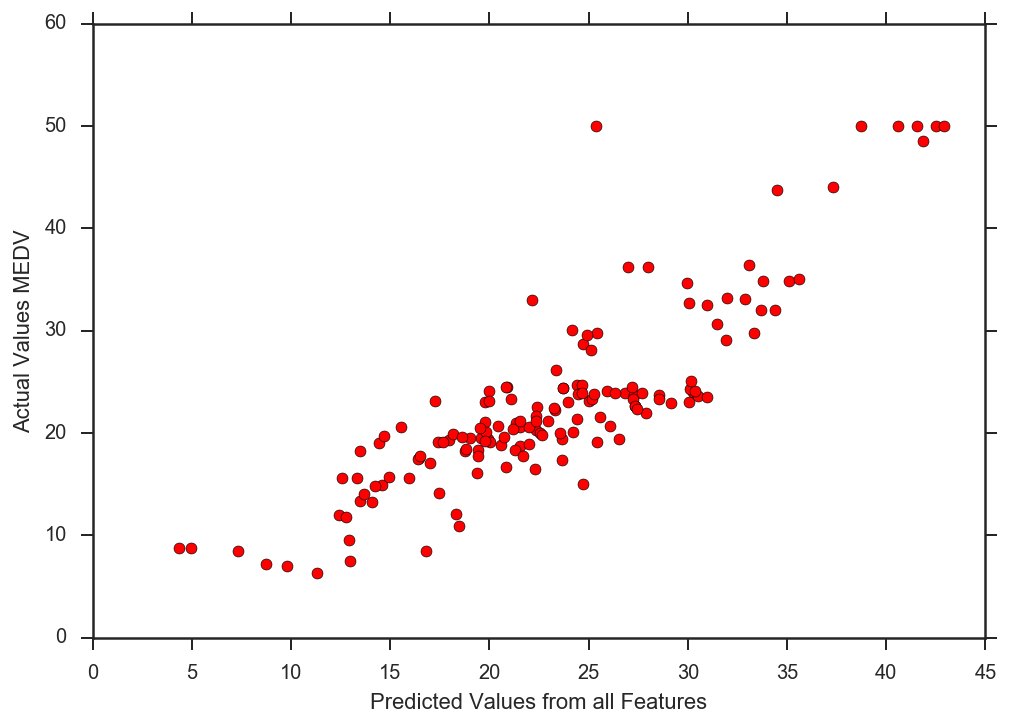

MSE: 20.9613628412


In [84]:
plt.scatter(predictions2, y_test, s=30, c='r', marker='o', zorder=10)
plt.xlabel("Predicted Values from all Features")
plt.ylabel("Actual Values MEDV")
plt.show()

print "MSE:", mean_squared_error(y_test, predictions2) 

In [85]:

print "MSE: \n%f \n" % mean_squared_error(y_test, predictions2)

# Alternatively, you can calulate MSE this way 
print "Residual sum of squares: \n%.2f \n" % (np.mean((predictions2 - y_test) ** 2))

print "Coefficients ('RM'): \n%s \n" % model.coef_

# R^2 (predictions vs actual target) - normalized measure of variance
# Can be negative, typically between 0 and 1.  Cam be negative depending on predictions way out outside the range of your target / training.
# Sum of squares / residual sum of squares
# Or 1 - variance(residuals) / variance(y)
print "R^2 / Variance Explained Score (1 = perfect score): \n%f \n" % score

MSE: 
20.961363 

Residual sum of squares: 
20.96 

Coefficients ('RM'): 
[ -1.27854091e-01   4.84925178e-02   2.29620607e-02   2.78286532e+00
  -2.24438324e+01   3.20829901e+00   2.53138228e-03  -1.65440819e+00
   2.95599013e-01  -9.44480915e-03  -1.13559713e+00   9.97951982e-03
  -5.14532754e-01] 

R^2 / Variance Explained Score (1 = perfect score): 
0.483525 



In [88]:
model3 = sm.OLS(y_train, x_train).fit()
predictions3 = model.predict(x_test)

predictions3[0:10]

array([ 21.08324308,  30.26678444,  17.01847041,  16.42646762,
        21.54259489,  13.48187371,  42.50308506,   4.35715114,
         9.80097104,  17.95095037])

In [89]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     558.6
Date:                Tue, 06 Dec 2016   Prob (F-statistic):          7.62e-221
Time:                        15:13:10   Log-Likelihood:                -1080.9
No. Observations:                 354   AIC:                             2188.
Df Residuals:                     341   BIC:                             2238.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.1080      0.042     -2.584      0.010        -0.190    -0.026
ZN             0.0511      0.019      2.681      0.008         0.014     0.089
INDUS         -0.0052      0.085     -0.061      0.952        -0.172     0.162
CHAS           2.9537      1.147      2.575      0.010         0.697     5.210
NOX           -3.1490      4.173     -0.755      0.451       -11.357     5.059
RM             5.6560      0.389     14.531      0.000         4.890     6.422
AGE            0.0002      0.018      0.013      0.989        -0.035     0.035
DIS           -0.8655      0.264     -3.273      0.001        -1.386    -0.345
RAD            0.1483      0.085      1.752      0.081        -0.018     0.315
TAX           -0.0066      0.005     -1.300      0.195        -0.017     0.003
PTRATIO       -0.4100      0.135     -3.038      0.003        -0.675    -0.145
B              0.0161      0.003      4.966      0.000         0.010     0.022
LSTAT         -0.4075      0.062     -6.610      0.000        -0.529    -0.286
==============================================================================
Omnibus:                      138.491   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.046
Skew:                           1.554   Prob(JB):                    2.03e-166
Kurtosis:                       9.487   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""